### 학생의 공부시간과 획득 점수를 예측해본다

x = 공부시간
y = 0 ~ 100점 사이 

regression

|x(hours)| y(score)|
|--------|---------|
|10|90|
|9|80|
|3|50|
|2|30|

위의 데이터를 가지고, 모델을 만들고 학습을 하고, \
새로운데이터(7시간 공부한 학생)의 스코어(점수)를 예측한다.

|x|y|
|-|-|
|1|1|
|2|2|
|3|3|

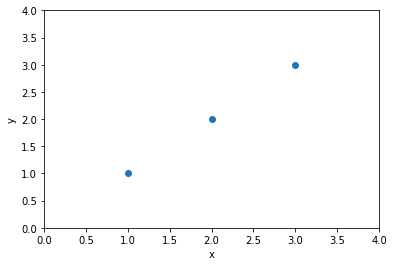

In [5]:
from matplotlib import pyplot as plt

x = [1, 2, 3]
y = [1, 2, 3]

plt.plot(x, y, 'o')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel("x")
plt.ylabel("y")

plt.show()

# Linear Hypothesis

H(x) = Wx + b
일차방정식으로 가설을 세운다.

위의 경우 H(x) = 1 * 1 + 0 으로 나옴

일차방정식과 실제데이터간의 거리가 가까울수록 W와 B값이 좋은 값이다.
우리가 세운 가설과 실제데이터가 얼마나 다른지 확인 - cost function 혹은 loss function

제곱을 많이 해준다. 차이를 모두 양수로 변환할 수 있어 장점

코스트 펑션 : 각 좌표의 값을 코스트 펑션에 넣어 각 좌표의 갯수로 나누어 평균을 내준다.


W와 b를 최소화하는! minimized cost